In [54]:
import scipy.io.wavfile as wav
import scipy.signal as sig

import matplotlib.pyplot as plt
import numpy as np

import IPython.display as ipd

bach = 'gavotte_en_rondeau.wav'
speech = 'corpus/wav48/p225/p225_006.wav'

In [14]:
ipd.Audio(speech)

In [55]:
fs, audio_time_orig = wav.read(speech) # actually a stereo file, so contains data for the left and right speaker
fs

48000

In [16]:
audio_time_orig = np.array(audio_time_orig)
audio_time_orig[fs // 2:fs // 2 + fs // 10] = 0

In [56]:
freqs, times, audio_freqs = sig.stft(audio_time_orig, fs) # using just the audio from the left speaker

In [18]:
std = audio_freqs.std()
audio_freqs[64:] = 0

In [19]:
audio_freqs[abs(audio_freqs) < 25] = 0

IndexError: index 51 is out of bounds for axis 1 with size 51

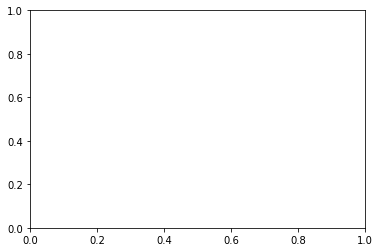

In [20]:
plt.hist(audio_freqs.reshape(-1), bins=50)
plt.show()

In [ ]:
def show_spectra(i, size, f, t, z, imax):
    part = slice(i*size, (i+1)*size)
    plt.pcolormesh(t[part], f, np.abs(z[:,part]), vmin=0, vmax=imax)

In [50]:
def filter_start(freqs, cutoff=25):
    mags = np.abs(freqs).mean(axis=0)
    start = 0
    end = -1
    
    while mags[start] < 25:
        start += 1
    
    while mags[end] < 25:
        end -= 1
    
    return start, end

In [58]:
times[-515]

6.397333333333334

In [51]:
filter_start(audio_freqs)

(592, -515)

In [53]:
515*2.5

1287.5

In [43]:
audio_freqs.shape

(129, 2914)

In [32]:
import rml.utils.plotting as plot

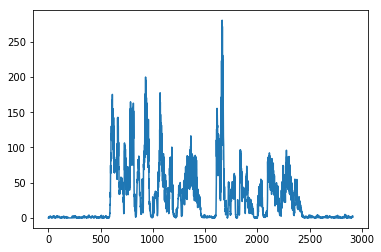

In [33]:
plot.plot_list()

In [22]:
times, audio_time = sig.istft(audio_freqs, fs)

In [23]:
# not as deep as the original, but I give it a pass, might be a lot better just making it stero again
ipd.Audio(audio_time, rate=fs)

In [9]:
# original, but only left for a better comparison, I can't tell them apart